# Food Demand Forecasting
## Genpact Machine Learning Hackathon

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.naive_bayes import GaussianNB

### Understanding the Dataset

#### Train Data

In [4]:
df = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\train.csv")

In [5]:
# printing first 5 rows of the Dataset
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [9]:
# printing last 5 rows of the Dataset
df.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729
456547,1361984,145,61,2490,292.03,290.03,0,0,162


In [11]:
# Shape of the Dataset
print("The Shape of the Dataset is:",df.shape)

The Shape of the Dataset is: (456548, 9)


In [13]:
# To print the columns of the Dataset
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [15]:
print('COLUMN NAME,RECORD COUNT AND DATATYPES ARE AS FOLLOWS:')
df.info()

COLUMN NAME,RECORD COUNT AND DATATYPES ARE AS FOLLOWS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [17]:
# To get insights on the Datatypes of the Dataset
df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [19]:
df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

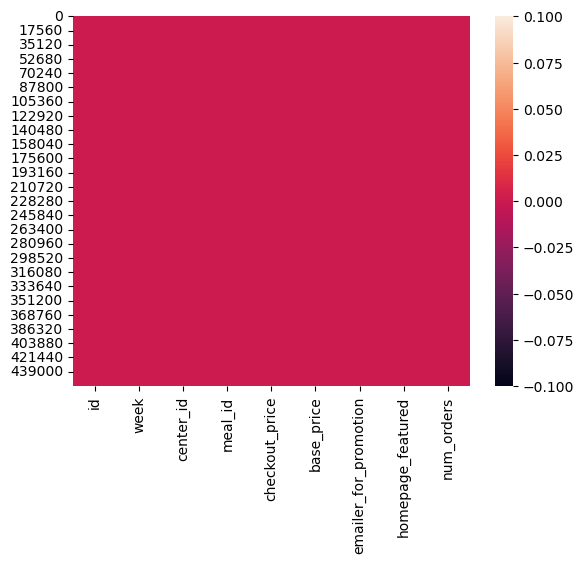

In [21]:
sns.heatmap(df.isnull())
plt.show()

In [22]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


### Defining Numerical and Categorical Columns

In [26]:
num_df = df.select_dtypes(include ="number")
cat_df = df.select_dtypes(include="object")

In [28]:
num_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [30]:
cat_df.shape

(456548, 0)

In [49]:
df['homepage_featured'].unique()

array([0, 1], dtype=int64)

In [51]:
df['emailer_for_promotion'].unique()

array([0, 1], dtype=int64)

In [53]:
# This Dataset does not have Categorical Columns

In [55]:
print('Missing Value Presence in different columns of DataFrame are as follows: ')
print('-'*100)
total = df.isnull().sum()
percent = (df.isnull().sum()/df.isnull().count()*100)
pd.concat([total,percent], axis=1, keys=['Total','Percent'])

Missing Value Presence in different columns of DataFrame are as follows: 
----------------------------------------------------------------------------------------------------


,Total,Percent
id,0,0.0
week,0,0.0
center_id,0,0.0
meal_id,0,0.0
checkout_price,0,0.0
base_price,0,0.0
emailer_for_promotion,0,0.0
homepage_featured,0,0.0
num_orders,0,0.0


In [57]:
# No Missing Values in this Dataset

In [59]:
df['num_orders'].max()

24299

In [61]:
df['num_orders'].min()

13

## Exploratory Data Analysis

### Univariate Analysis

##### Number of Orders Distribution(Target Feature Distribution)

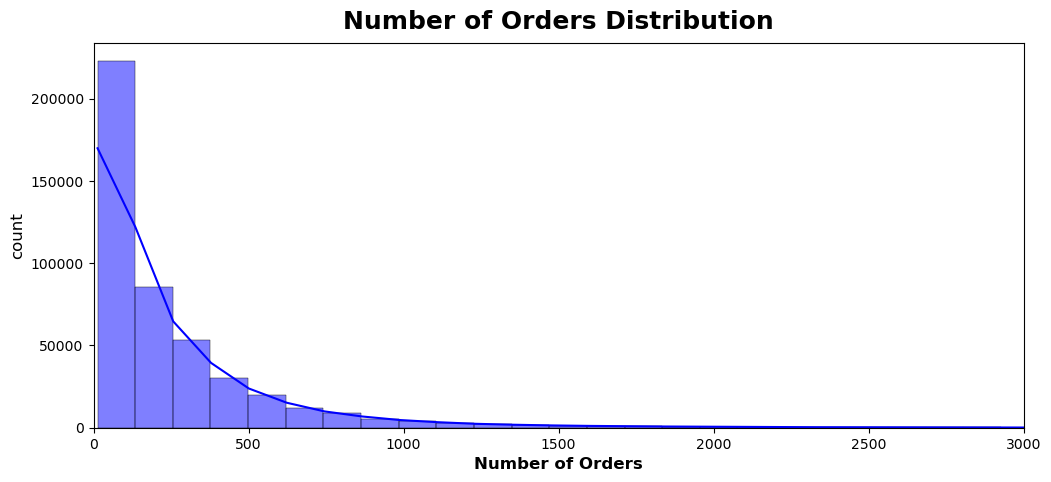

In [66]:
plt.subplots(figsize=(12,5))
sns.histplot(df.num_orders, bins=200, kde=True, color='b')
plt.title('Number of Orders Distribution', fontsize=18,weight='bold',pad=10)
plt.ylabel('count',fontsize=12)
plt.xlabel('Number of Orders',weight='bold',fontsize=12)
plt.xlim(0,3000)
plt.show()

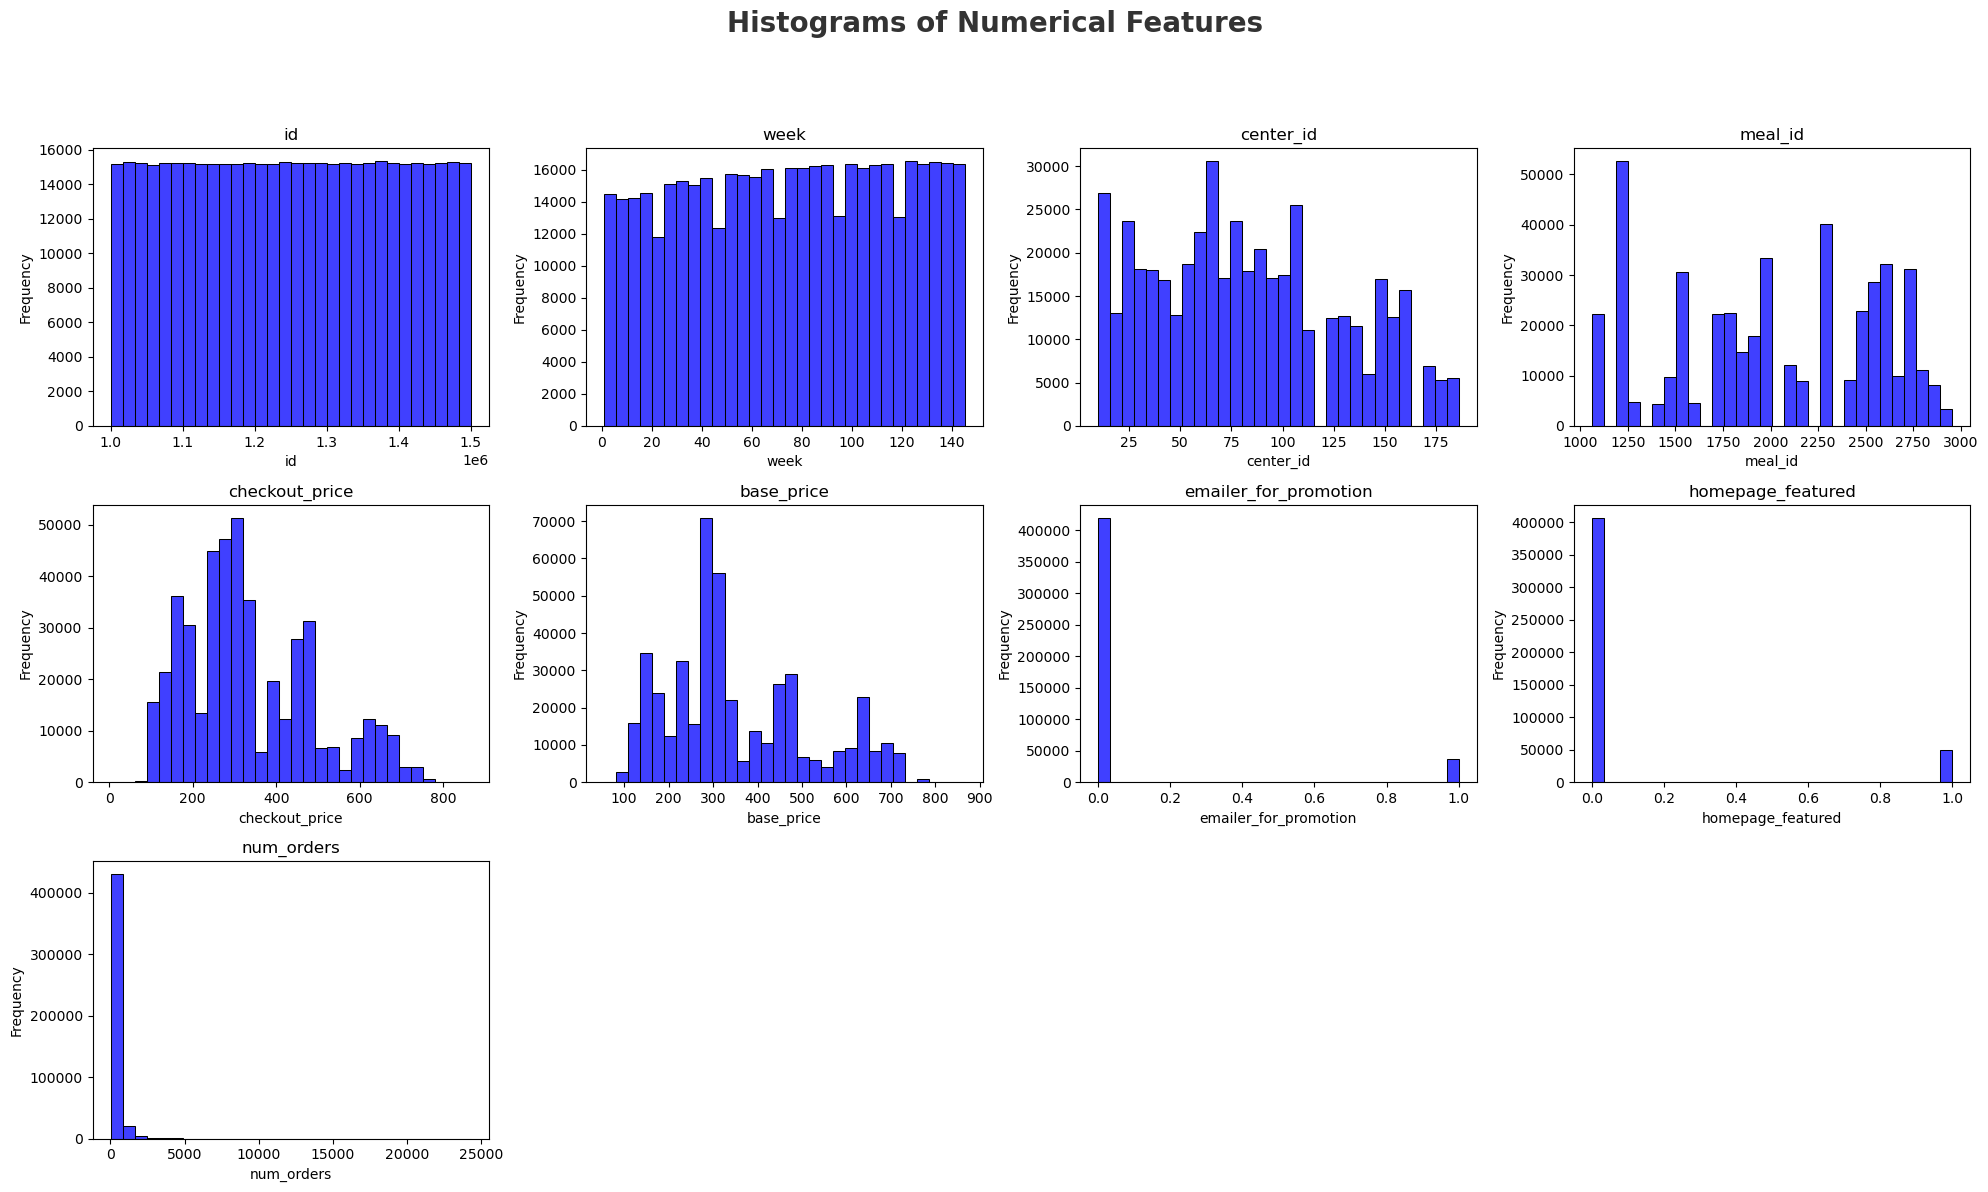

In [68]:
# Histogram to check for skewness
plt.figure(figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], bins=30, color='b')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [70]:
skewness = df.skew()
print(skewness)

id                      -0.001102
week                    -0.049517
center_id                0.345130
meal_id                 -0.172884
checkout_price           0.672330
base_price               0.637661
emailer_for_promotion    3.067713
homepage_featured        2.506022
num_orders               6.929966
dtype: float64


##### id, week, meal_id :
- Not Skewed
##### center_id, checkout_price, base_price :
- Moderately positively Skewed
##### homepage_featured, emailer_for_promotion, num_orders :
- Highly positively Skewed

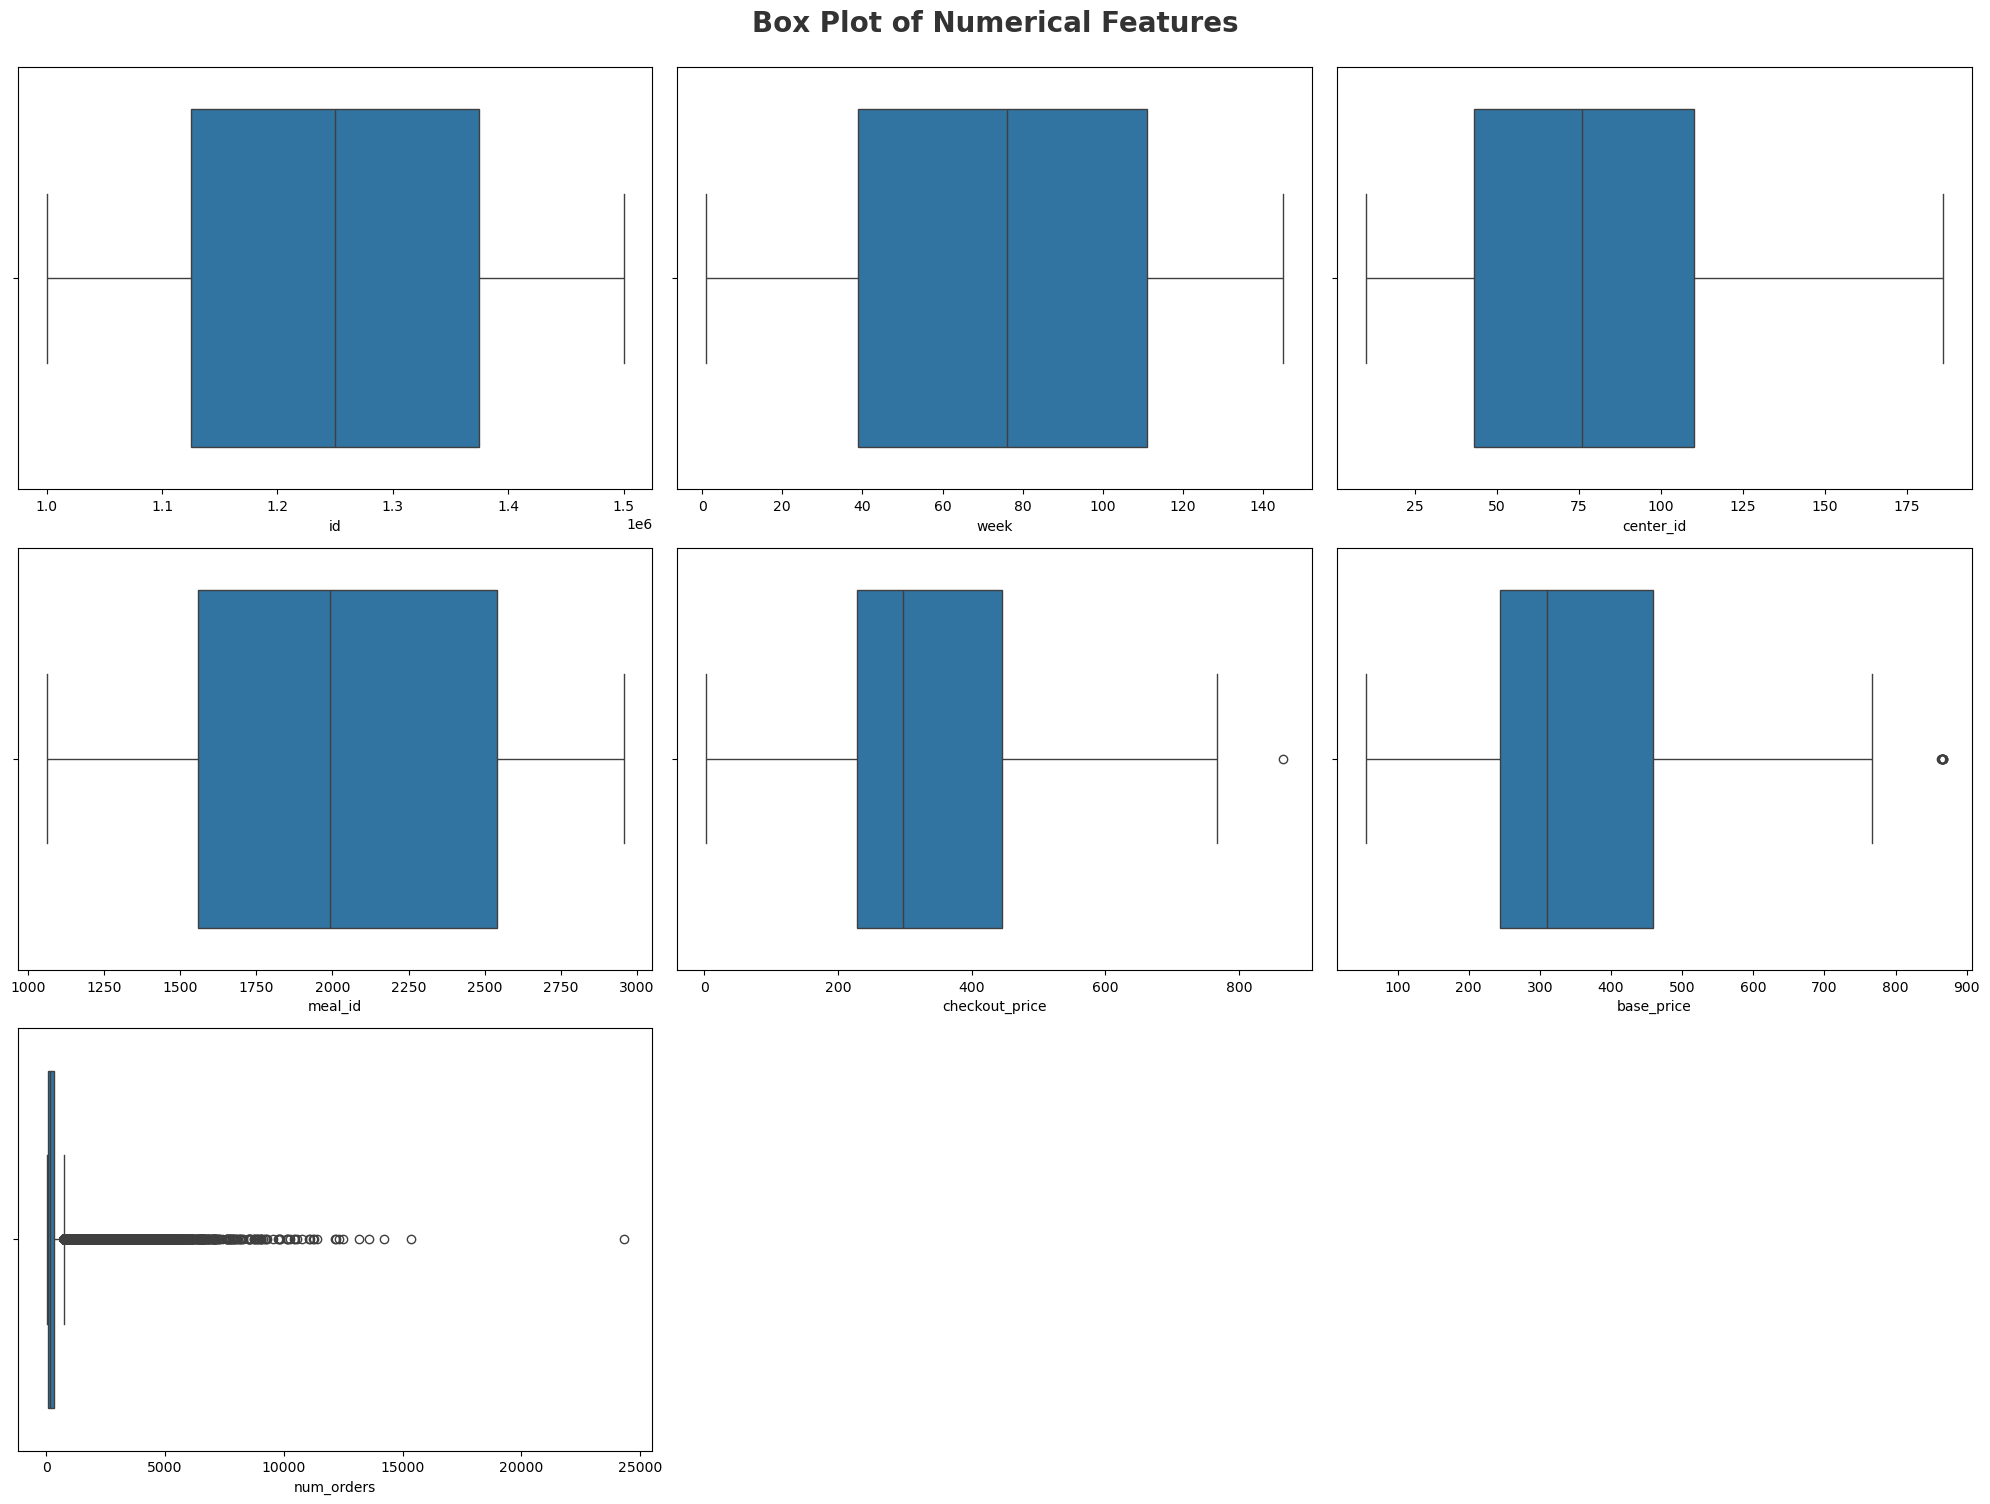

In [73]:
# Box Plot to check for Outliers
num_df_filtered = num_df.drop(columns=['emailer_for_promotion','homepage_featured'])

plt.figure(figsize=(20, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(num_df_filtered.columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[num_df_filtered.columns[i]])
    plt.xlabel(num_df_filtered.columns[i])
    plt.tight_layout()

plt.show()

##### Outliers in num_orders, base_price & checkout_price

In [75]:
# Removing Outliers
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper = upper_bound)
    df[column_name] = df[column_name].clip(lower = lower_bound)
    return df[column_name]  

In [76]:
for col in num_df:
    num_df[col] = remove_outliers(num_df, col)

### Bivariate Analysis

In [78]:
continuous_features=[feature for feature in num_df if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'num_orders']


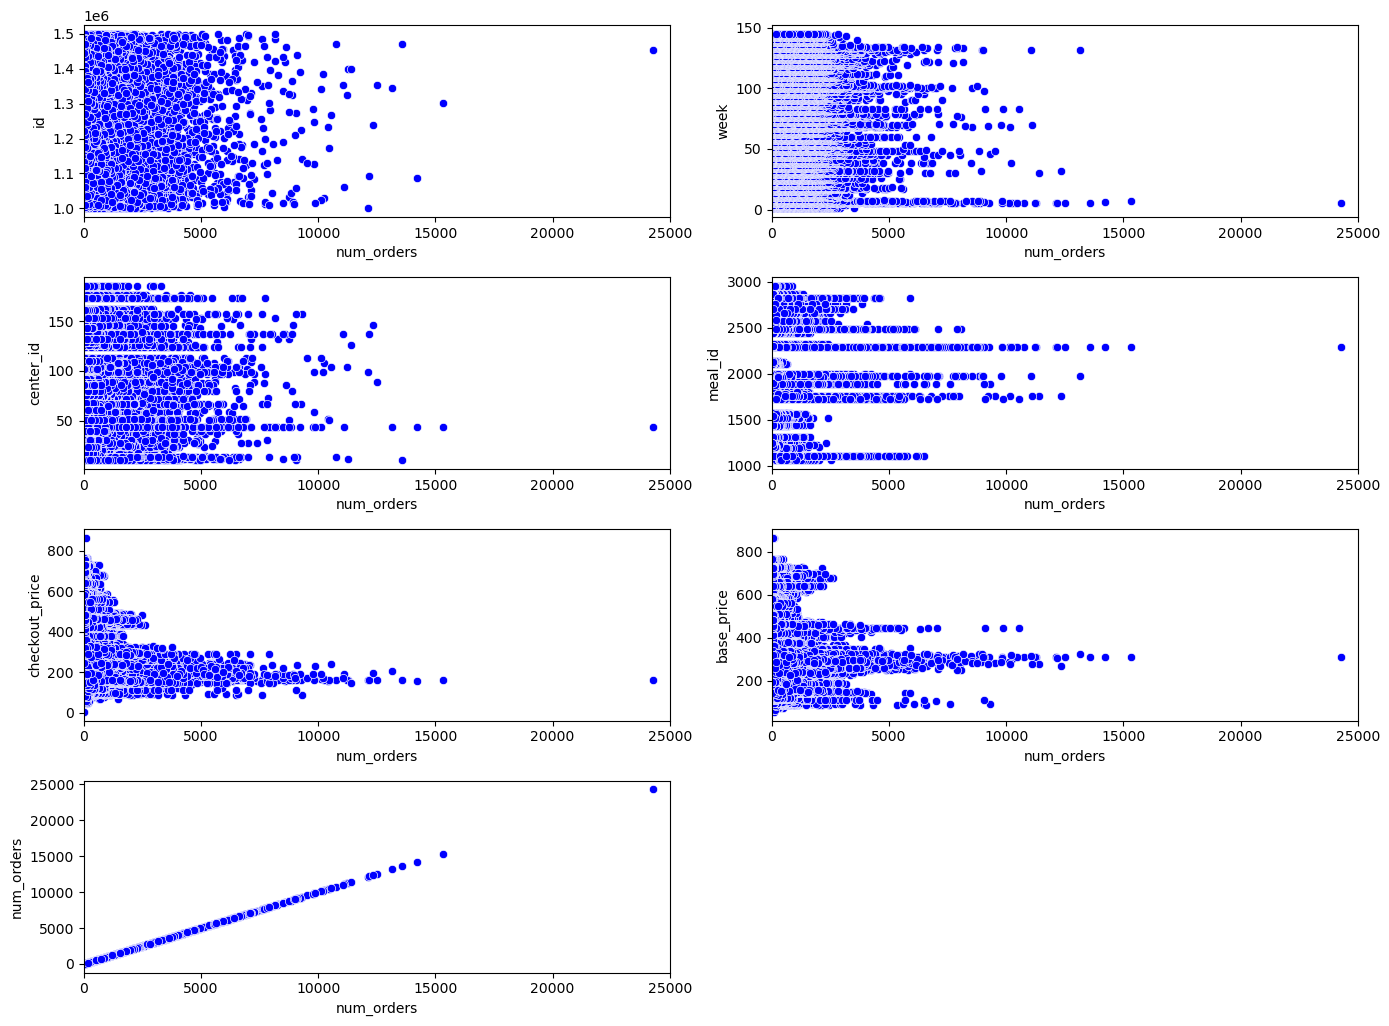

In [79]:
fig = plt.figure(figsize=(14, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='num_orders', y=continuous_features[i], color='b')
    plt.xlim(0,25000)
    
plt.tight_layout()
plt.show()

In [80]:
df[num_df.columns].corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000


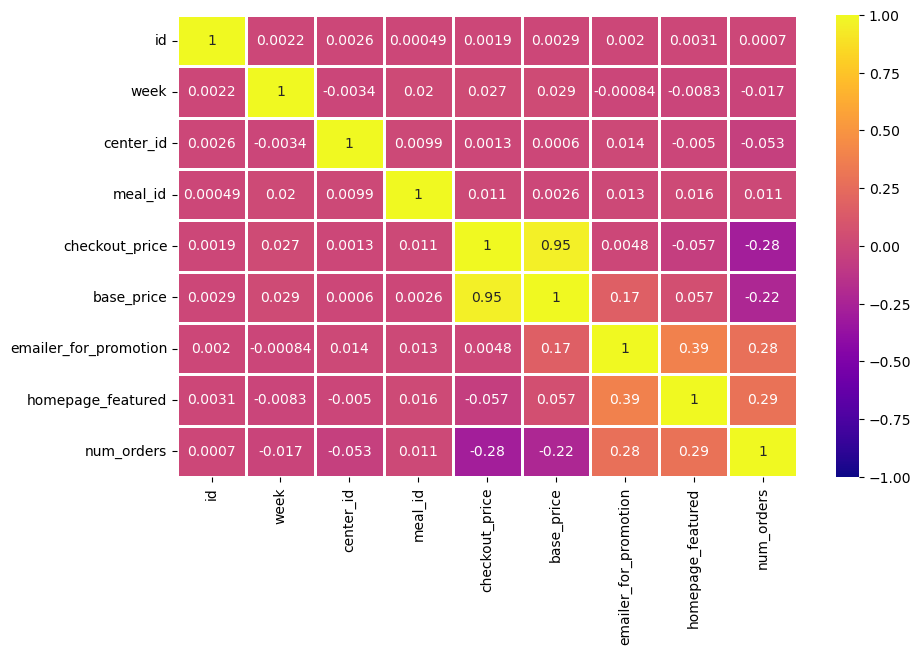

In [87]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df[num_df.columns].corr(),annot=True,cmap='plasma',vmin=-1,vmax=1,linecolor='white',linewidths=2)
plt.show()

### Test Data

In [90]:
dt = pd.read_csv("C:\\Users\\Archana\\Downloads\\test_QoiMO9B.csv")
dt.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [92]:
dt.shape

(32573, 8)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [179]:
train = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\train.csv")
center = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\fulfilment_center_info.csv")
meal = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\meal_info.csv")

In [180]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [183]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [185]:
center_num = center.select_dtypes("number")
center_cat = center.select_dtypes("object")

In [187]:
center_num

,center_id,city_code,region_code,op_area
0,11,679,56,3.7
1,13,590,56,6.7
2,124,590,56,4.0
3,66,648,34,4.1
4,94,632,34,3.6
...,...,...,...,...
72,53,590,56,3.8
73,30,604,56,3.5
74,76,614,85,3.0
75,68,676,34,4.1


In [189]:
center_cat

,center_type
0,TYPE_A
1,TYPE_B
2,TYPE_C
3,TYPE_A
4,TYPE_C
...,...
72,TYPE_A
73,TYPE_A
74,TYPE_A
75,TYPE_B


In [191]:
import pandas as pd

train = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\train.csv")
center = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\fulfilment_center_info.csv")
meal = pd.read_csv("C:\\Users\\Archana\\Downloads\\train_GzS76OK\\meal_info.csv")

train_merged = pd.merge(train, meal, on="meal_id", how="left")

final_train = pd.merge(train_merged, center, on="center_id", how="left")

final_train.to_csv("final_train.csv", index=False)

In [192]:
test = pd.read_csv("C:\\Users\\Archana\\Downloads\\test_QoiMO9B.csv")
test_merged = pd.merge(test, meal, on="meal_id", how="left")
final_test = pd.merge(test_merged, center, on="center_id", how="left")
final_test.to_csv("final_test.csv", index=False)

In [193]:
num_df = final_train.select_dtypes(include="number")
cat_df = final_train.select_dtypes(include="object_")

In [194]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)

Numerical columns are
['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code', 'region_code', 'op_area']
Categorical columns are
['category', 'cuisine', 'center_type']


### Univariate Analysis of Categorical Columns

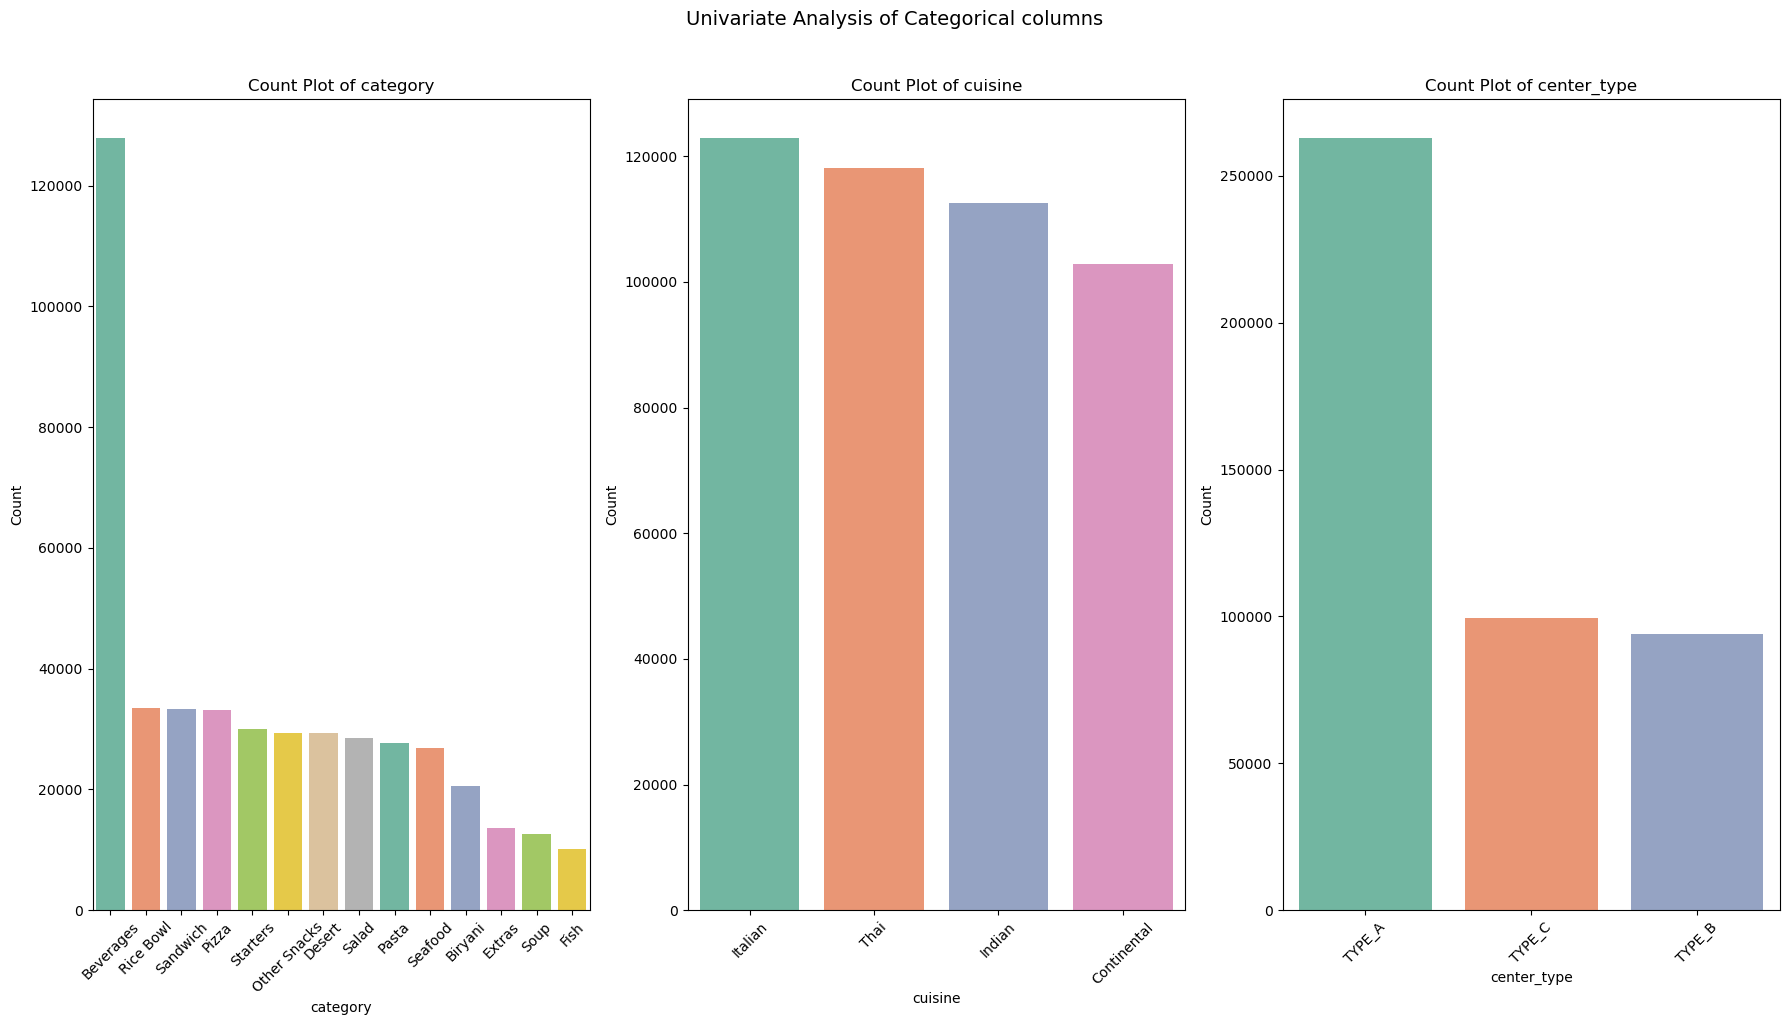

In [196]:
categorical_columns = ['category','cuisine','center_type']
# subplot
rows = 1
cols = 3
total_plots = len(categorical_columns)

fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten() 

for i, column in enumerate(categorical_columns):
    sns.countplot(data=final_train, x=column, ax=axes[i], palette='Set2', order=final_train[column].value_counts().index)
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  

fig.suptitle("Univariate Analysis of Categorical columns", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
plt.savefig("Univariate Analysis.jpg")

##### Observations
- mostly ordered category beverages
- least ordered category fish
- most ordered cuisine Italian
- least ordered cuisine continental
- most orderes from center type A

### Bivariate Analysis of Categorical Columns

<Figure size 640x480 with 0 Axes>

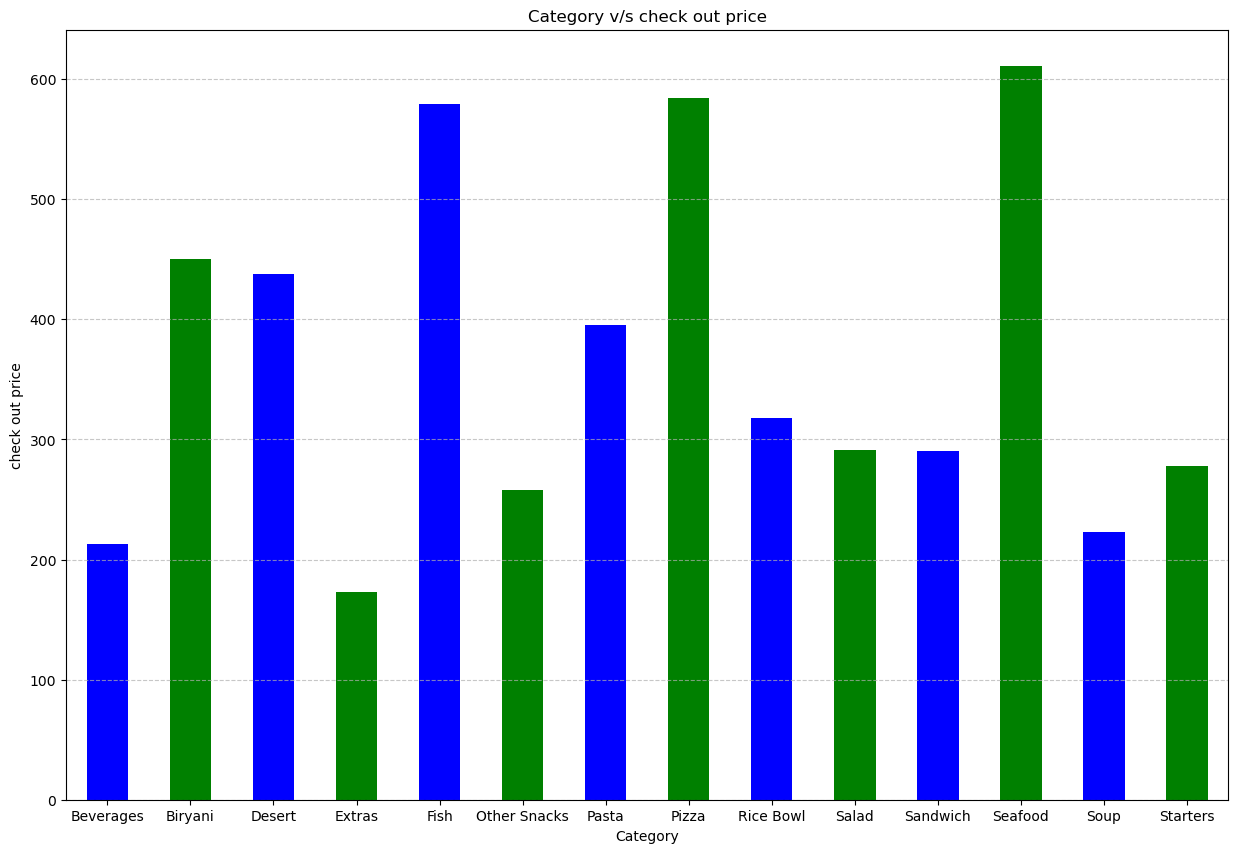

In [204]:
plt.figure(figsize=(15, 10))
Category_by_checkout_price = final_train.groupby('category')['checkout_price'].mean()
Category_by_checkout_price.plot(kind='bar', color=['blue', 'green'])
plt.title('Category v/s check out price')
plt.xlabel('Category')
plt.ylabel('check out price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Observations
- Highest checkout price - Seafood
- lowest checkout price - Extras

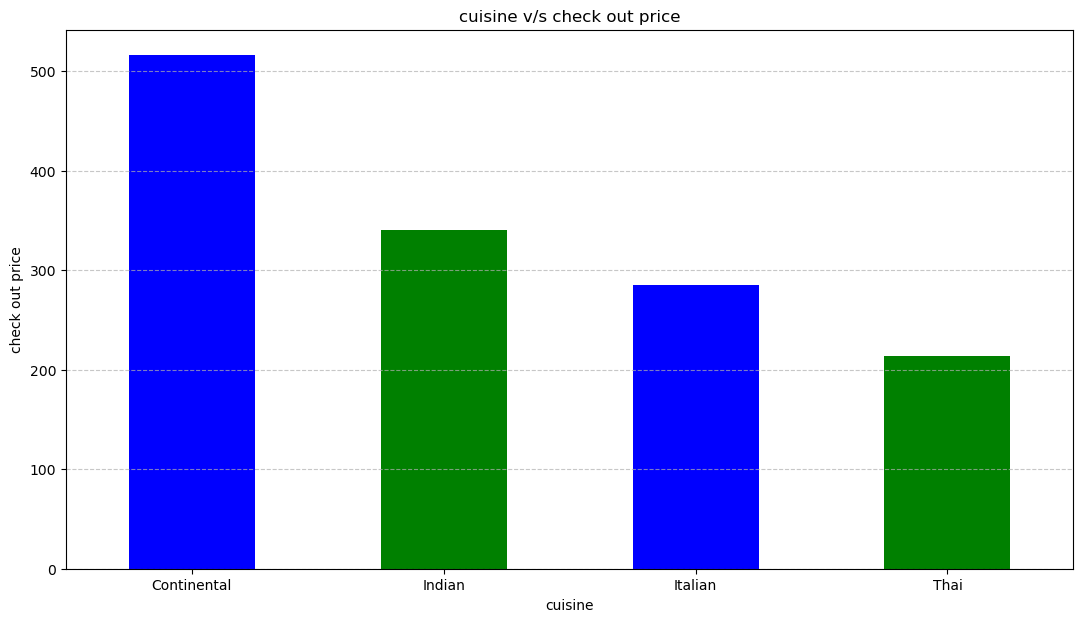

In [207]:
plt.figure(figsize=(13, 7))
Cuisine_by_checkout_price = final_train.groupby('cuisine')['checkout_price'].mean()
Cuisine_by_checkout_price.plot(kind='bar', color=['blue', 'green'])
plt.title('cuisine v/s check out price')
plt.xlabel('cuisine')
plt.ylabel('check out price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Observations
- most priciest cuisine - Continental

## Test Data

In [287]:
final_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,0.056304,0.0,0.255682,0.434530,0.086266,0.068274,0.0,0.0,Beverages,Thai,0.743191,0.471429,TYPE_C,0.180328
1,0.254283,0.0,0.255682,0.491552,0.088178,0.068274,0.0,0.0,Beverages,Thai,0.743191,0.471429,TYPE_C,0.180328
2,0.425320,0.0,0.255682,0.779831,0.085338,0.068303,0.0,0.0,Beverages,Thai,0.743191,0.471429,TYPE_C,0.180328
3,0.165255,0.0,0.255682,0.828405,0.090005,0.071117,0.0,0.0,Beverages,Indian,0.743191,0.471429,TYPE_C,0.180328
4,0.801825,0.0,0.255682,0.098205,0.091831,0.072984,0.0,0.0,Beverages,Indian,0.743191,0.471429,TYPE_C,0.180328


In [289]:
num_df = final_test.select_dtypes(include = "number")
cat_df = final_test.select_dtypes(include = "object")

In [ ]:
card = final_train["id"]
final_

In [254]:
from sklearn.preprocessing import MinMaxScaler
target_column = 'num_orders' 
numerical_column = final_train.select_dtypes(include=('float64','int64')).columns
numerical_column = numerical_column[numerical_column != target_column]
min_max= MinMaxScaler()
final_train[numerical_column]= min_max.fit_transform(final_train[numerical_column])

In [255]:
from sklearn.preprocessing import MinMaxScaler
target_column = 'num_orders' 
numerical_column = final_test.select_dtypes(include=('float64','int64')).columns
numerical_column = numerical_column[numerical_column != target_column]
min_max= MinMaxScaler()
final_test[numerical_column]= min_max.fit_transform(final_test[numerical_column])

In [258]:
y = final_train['num_orders']
x= final_train.drop('num_orders', axis = 1)

### Encoding

In [270]:
from sklearn import preprocessing 
label_enc = preprocessing.LabelEncoder() 

In [280]:
final_train["category"]=label_enc.fit_transform(final_train["category"])
final_train["cuisine"]=label_enc.fit_transform(final_train["cuisine"])
#dt["Dependents"]=label_enc.fit_transform(dt["Dependents"])
final_train["center_type"]=label_enc.fit_transform(final_train["center_type"])
dependent_num=["0","1","2","3+"]
ord_enc=OrdinalEncoder(categories=[dependent_num])
final_train["Dependents"]=ord_enc.fit_transform(final_train[["Dependents"]])

KeyError: "None of [Index(['Dependents'], dtype='object')] are in the [columns]"

### Train Test Split

In [282]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [284]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

MemoryError: could not allocate 4945084416 bytes

In [278]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

NameError: name 'y_pred' is not defined